# 波士顿房价预测——一元线性回归 

### 加载数据集

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
boston_housing = tf.keras.datasets.boston_housing
(train_x,train_y),(test_x,test_y)=boston_housing.load_data()

In [3]:
train_x.shape,train_y.shape

((404, 13), (404,))

In [4]:
test_x.shape,test_y.shape

((102, 13), (102,))

### 数据处理

In [5]:
x_train=train_x[:,5]
y_train=train_y

In [6]:
x_train.shape,y_train.shape

((404,), (404,))

In [7]:
x_test=test_x[:,5]
y_test=test_y

In [8]:
x_test.shape,y_test.shape

((102,), (102,))

### 设置超参数

In [9]:
learn_rate=0.04      #学习率为0.04
iter=2000            #迭代次数为2000
display_step=200     #显示间隔为200

### 设置模型参数初始值

In [10]:
np.random.seed(612)
w=tf.Variable(np.random.randn())   #设置w数据类型
b=tf.Variable(np.random.randn())

In [11]:
w.numpy().dtype,b.numpy().dtype

(dtype('float32'), dtype('float32'))

### 训练模型

In [12]:
mse_train=[]            #记录训练误差
mse_test=[]             #记录测试误差

for i in range(0,iter+1):
    
    with tf.GradientTape() as tape:    #放在梯度带的with语句中，实现对w和b的监视
        
        pred_train=w*x_train+b         #训练集的预测值
        loss_train=0.5*tf.reduce_mean(tf.square(y_train-pred_train))   #训练集均方误差
        
        pred_test=w*x_test+b           #测试集的预测值  ###使用训练集的w和b对测试机进行预测
        loss_test=0.5*tf.reduce_mean(tf.square(y_test-pred_test))      #测试集的均方误差
        
    mse_train.append(loss_train)       #训练误差记录在列表中
    mse_test.append(loss_test)         #测试误差记录在列表中
    
    dL_dw,dL_db=tape.gradient(loss_train,[w,b])          #使用训练集中的数据计算损失函数Loss对w和b的梯度
    w.assign_sub(learn_rate*dL_dw)                       #使用该梯度更新w和b
    b.assign_sub(learn_rate*dL_db)                       
    
    if i % display_step == 0:
        print("i:%i,Train Loss:%f,Test Loss:%f" % (i,loss_train,loss_test))

i:0,Train Loss:321.837585,Test Loss:337.568665
i:200,Train Loss:28.122614,Test Loss:26.237764
i:400,Train Loss:27.144741,Test Loss:25.099329
i:600,Train Loss:26.341951,Test Loss:24.141077
i:800,Train Loss:25.682898,Test Loss:23.332981
i:1000,Train Loss:25.141848,Test Loss:22.650158
i:1200,Train Loss:24.697674,Test Loss:22.072004
i:1400,Train Loss:24.333027,Test Loss:21.581432
i:1600,Train Loss:24.033665,Test Loss:21.164263
i:1800,Train Loss:23.787907,Test Loss:20.808695
i:2000,Train Loss:23.586145,Test Loss:20.504940


### 可视化输出

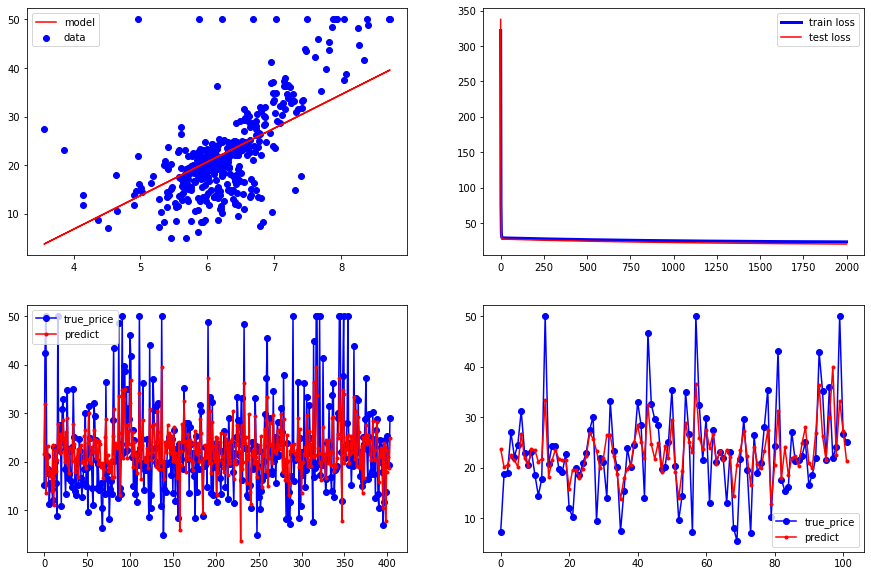

In [13]:
plt.figure(figsize=(15,10))

plt.subplot(221)
plt.scatter(x_train,y_train,color="blue",label="data")
plt.plot(x_train,pred_train,color="red",label="model")
plt.legend(loc="upper left")

plt.subplot(222)
plt.plot(mse_train,color="blue",linewidth=3,label="train loss")
plt.plot(mse_test,color="red",linewidth=1.5,label="test loss")
plt.legend(loc="upper right")

plt.subplot(223)
plt.plot(y_train,color="blue",marker="o",label="true_price")
plt.plot(pred_train,color="red",marker=".",label="predict")
plt.legend()

plt.subplot(224)
plt.plot(y_test,color="blue",marker="o",label="true_price")
plt.plot(pred_test,color="red",marker=".",label="predict")
plt.legend()

plt.show()

# 多元线性回归

### 二维数组归一化——循环实现

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [15]:
boston_housing = tf.keras.datasets.boston_housing
(train_x,train_y),(test_x,test_y)=boston_housing.load_data()

In [16]:
train_x.shape,train_y.shape

((404, 13), (404,))

In [17]:
test_x.shape,test_y.shape

((102, 13), (102,))

In [18]:
import numpy as np

In [19]:
x=np.array([[3.,10.,500.,],
            [2.,20.,200.,],
            [1.,30.,300.,],
            [5.,50.,100.]])

In [20]:
x.dtype,x.shape

(dtype('float64'), (4, 3))

In [21]:
len(x)

4

In [22]:
x.shape[0],x.shape[1]#读取行数，读取列数

(4, 3)

In [23]:
for i in range(x.shape[1]):#循环“列数”次
    x[:,i]=(x[:,i]-x[:,i].min())/(x[:,i].max()-x[:,i].min())#对第i列进行归一化

In [24]:
x

array([[0.5 , 0.  , 1.  ],
       [0.25, 0.25, 0.25],
       [0.  , 0.5 , 0.5 ],
       [1.  , 1.  , 0.  ]])

### 二维数组归一化——广播运算

In [25]:
x=np.array([[3.,10.,500.,],
            [2.,20.,200.,],
            [1.,30.,300.,],
            [5.,50.,100.]])

In [26]:
x.min(axis=0)#取出每一列的最小值

array([  1.,  10., 100.])

In [27]:
x.max(axis=0)#取出每一列的最大值

array([  5.,  50., 500.])

In [28]:
x.max(axis=0)-x.min(axis=0)#每一列的最大值减去每一列的最小值

array([  4.,  40., 400.])

In [29]:
x.max(axis=0)-x.min(axis=0)

array([  4.,  40., 400.])

In [30]:
x-x.min(axis=0)#用x减去每一列的最小值

array([[  2.,   0., 400.],
       [  1.,  10., 100.],
       [  0.,  20., 200.],
       [  4.,  40.,   0.]])

In [31]:
(x-x.min(axis=0))/(x.max(axis=0)-x.min(axis=0))#用上式结果除以每一列的最大值与最小值之差，进行归一化处理

array([[0.5 , 0.  , 1.  ],
       [0.25, 0.25, 0.25],
       [0.  , 0.5 , 0.5 ],
       [1.  , 1.  , 0.  ]])

### 加载数据集

In [32]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [33]:
boston_housing = tf.keras.datasets.boston_housing
(train_x,train_y),(test_x,test_y)=boston_housing.load_data()

In [34]:
train_x.shape,train_y.shape

((404, 13), (404,))

In [35]:
test_x.shape,test_y.shape

((102, 13), (102,))

In [36]:
num_train=len(train_x)
num_test=len(test_x)#测试集和训练集的样本数量

### 数据处理

In [37]:
x_train=(train_x-train_x.min(axis=0))/(train_x.max(axis=0)-train_x.min(axis=0))
y_train=train_y#对训练样本的所有属性归一化

x_test=(test_x-test_x.min(axis=0))/(test_x.max(axis=0)-test_x.min(axis=0))
y_test=test_y#对测试样本的所有属性归一化

In [38]:
x0_train=np.ones(num_train).reshape(-1,1)#生成相对应行数的全一数组
x0_test=np.ones(num_test).reshape(-1,1)

In [39]:
X_train=tf.cast(tf.concat([x0_train,x_train],axis=1),tf.float32)#concat数组堆叠，cast类型转换
X_test=tf.cast(tf.concat([x0_test,x_test],axis=1),tf.float32)#将全一数组堆叠到测试数组之前，并将数据类型转换为32位浮点数

In [40]:
X_train.shape,X_test.shape

(TensorShape([404, 14]), TensorShape([102, 14]))

In [41]:
Y_train=tf.constant(y_train.reshape(-1,1),tf.float32)
Y_test=tf.constant(y_test.reshape(-1,1),tf.float32)

In [42]:
Y_train.shape,Y_test.shape#把房价转换为列向量

(TensorShape([404, 1]), TensorShape([102, 1]))

### 设置超参数

In [43]:
learn_rate=0.01
iter=2000
display_step=200

In [44]:
np.random.seed(612)
W = tf.Variable(np.random.randn(14,1),dtype=tf.float32)

### 训练模型

In [45]:
mse_train=[]
mse_test=[]

for i in range(0,iter+1):
    
    with tf.GradientTape() as tape:
        PRED_train=tf.matmul(X_train,W)
        Loss_train=0.5*tf.reduce_mean(tf.square(Y_train-PRED_train))#计算训练集的预测房价和损失
        
        PRED_test=tf.matmul(X_test,W)
        Loss_test=0.5*tf.reduce_mean(tf.square(Y_test-PRED_test))#计算测试集的预测房价和损失
        
    mse_train.append(Loss_train)#将损失结果记录在表中
    mse_test.append(Loss_test)
    
    dL_dW=tape.gradient(Loss_train,W)#使用训练集的样本更新模型参数
    W.assign_sub(learn_rate*dL_dW)
    
    if i % display_step == 0:
        print("i:%i,Train Loss:%f,Test Loss:%f"% (i,Loss_train,Loss_test))

i:0,Train Loss:263.193451,Test Loss:276.994110
i:200,Train Loss:36.176548,Test Loss:37.562954
i:400,Train Loss:28.789461,Test Loss:28.952513
i:600,Train Loss:25.520697,Test Loss:25.333916
i:800,Train Loss:23.460527,Test Loss:23.340536
i:1000,Train Loss:21.887278,Test Loss:22.039747
i:1200,Train Loss:20.596283,Test Loss:21.124844
i:1400,Train Loss:19.510204,Test Loss:20.467239
i:1600,Train Loss:18.587011,Test Loss:19.997717
i:1800,Train Loss:17.797461,Test Loss:19.671591
i:2000,Train Loss:17.118925,Test Loss:19.456860


### 可视化输出

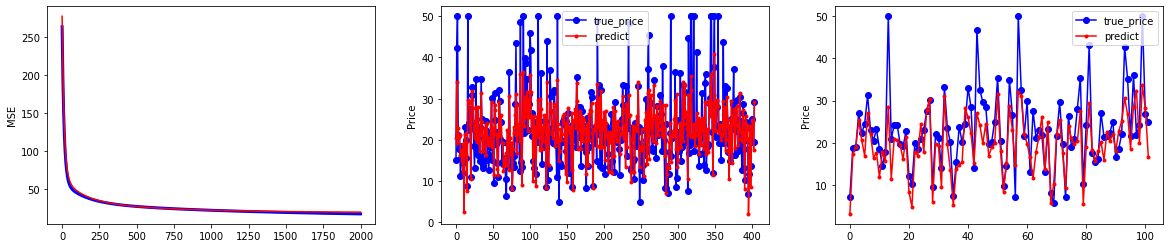

In [47]:
plt.figure(figsize=(20,4))

plt.subplot(131)
plt.ylabel("MSE")
plt.plot(mse_train,color="blue",linewidth=3)
plt.plot(mse_test,color="red",linewidth=1.5)

plt.subplot(132)
plt.plot(y_train,color="blue",marker="o",label="true_price")
plt.plot(PRED_train,color="red",marker=".",label="predict")
plt.legend()
plt.ylabel("Price")

plt.subplot(133)
plt.plot(y_test,color="blue",marker="o",label="true_price")
plt.plot(PRED_test,color="red",marker=".",label="predict")
plt.legend()
plt.ylabel("Price")

plt.show()